<a href="https://colab.research.google.com/github/chandrajitpal/Cybersecurity/blob/main/cyberlabs/LAB4_CYBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Network Anomaly Detection with AI**

In [4]:
import numpy as np
import pandas as pd

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


# Load the data.
dataset = pd.read_csv('/content/drive/My Drive/PICTURES_CYBER/network-logs.csv' , delimiter=',')



samples = dataset.iloc[:, [1, 2]].values
targets = dataset['ANOMALY'].values

training_samples, testing_samples, training_targets, testing_targets = train_test_split(
         samples, targets, test_size=0.3, random_state=0)



# k-Nearest Neighbors model
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(training_samples,training_targets)
knc_prediction = knc.predict(testing_samples)
knc_accuracy = 100.0 * accuracy_score(testing_targets, knc_prediction)
print ("K-Nearest Neighbours accuracy: " + str(knc_accuracy))



# Decision tree model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(training_samples,training_targets)
dtc_prediction = dtc.predict(testing_samples)
dtc_accuracy = 100.0 * accuracy_score(testing_targets, dtc_prediction)
print ("Decision Tree accuracy: " + str(dtc_accuracy))


# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(training_samples,training_targets)
gnb_prediction = gnb.predict(testing_samples)
gnb_accuracy = 100.0 * accuracy_score(testing_targets, gnb_prediction)
print ("Gaussian Naive Bayes accuracy: " + str(gnb_accuracy))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
K-Nearest Neighbours accuracy: 95.90163934426229
Decision Tree accuracy: 96.72131147540983
Gaussian Naive Bayes accuracy: 98.36065573770492


**Gaussian anomaly detection example**

First of all, let's import the necessary Python libraries, and then load the data from a .csv
file that represents the latency and network throughput values of each data stream we
detected:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


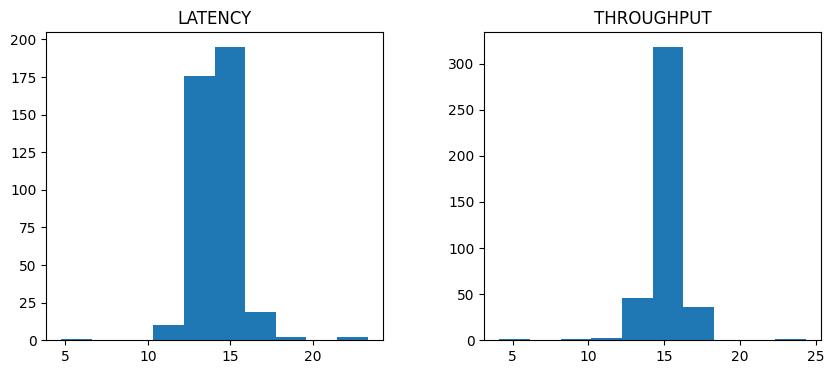

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


# Load the data.
dataset = pd.read_csv('/content/drive/My Drive/PICTURES_CYBER/network-logs.csv' , delimiter=',')


hist_dist = dataset[['LATENCY', 'THROUGHPUT']].hist(grid=False, figsize=(10,4))

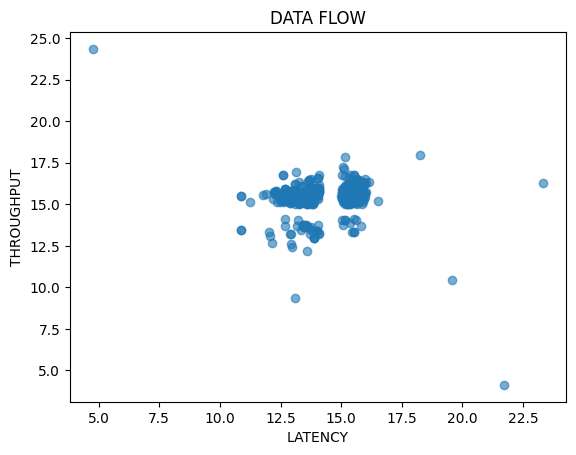

In [6]:
data = dataset[['LATENCY', 'THROUGHPUT']].values

plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')
plt.show()


In [13]:

import requests

url = "https://raw.githubusercontent.com/trekhleb/homemade-machine-learning/master/homemade/anomaly_detection/gaussian_anomaly_detection.py"
response = requests.get(url)

with open("gaussian_anomaly_detection.py", "w") as f:
    f.write(response.text)



"""
Anomaly Detection Module
Thanks to Oleksii Trekhleb:
https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/anomaly_detection/gaussian_anomaly_detection.py
"""
from gaussian_anomaly_detection import GaussianAnomalyDetection

gaussian_anomaly_detection = GaussianAnomalyDetection(data)

print('mu param estimation: ')
print(gaussian_anomaly_detection.mu_param)

print('\n')

print('sigma squared estimation: ')
print(gaussian_anomaly_detection.sigma_squared)

mu param estimation: 
[14.42070163 15.39209133]


sigma squared estimation: 
[2.09674794 1.37224807]


In [14]:
targets = dataset['ANOMALY'].values.reshape((data.shape[0], 1))
probs = gaussian_anomaly_detection.multivariate_gaussian(data)

(threshold, F1, precision_, recall_, f1_) = gaussian_anomaly_detection.select_threshold(targets, probs)

print('\n')

print('threshold estimation: ')
print(threshold)




threshold estimation: 
0.00027176836728971885


[]

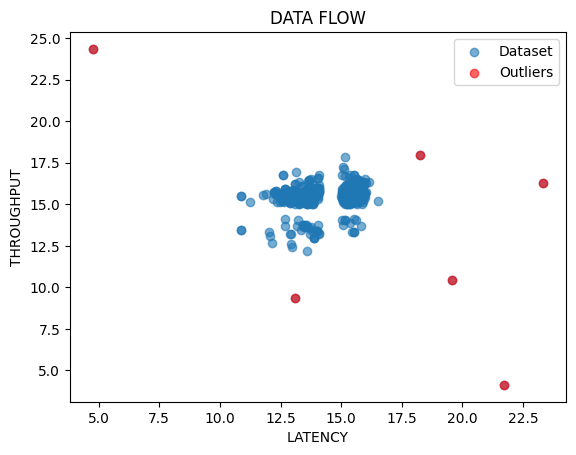

In [15]:
outliers = np.where(probs < threshold)[0]

# Plot original data.
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Dataset')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')

# Plot the outliers.
plt.scatter(data[outliers, 0], data[outliers, 1], alpha=0.6, c='red', label='Outliers')

# Display plots.
plt.legend()
plt.plot()


In [16]:

print('F1 score: ')
print(F1)



F1 score: 
0.6666666666666666


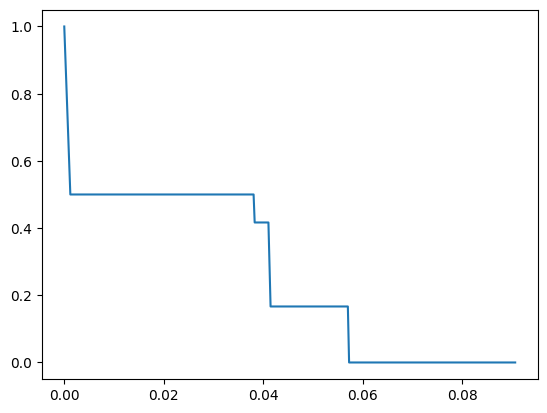

In [18]:


from sklearn.metrics import roc_curve

FPR, TPR, OPC = roc_curve(targets, probs)

# Plotting Sensitivity
plt.plot(OPC,TPR)

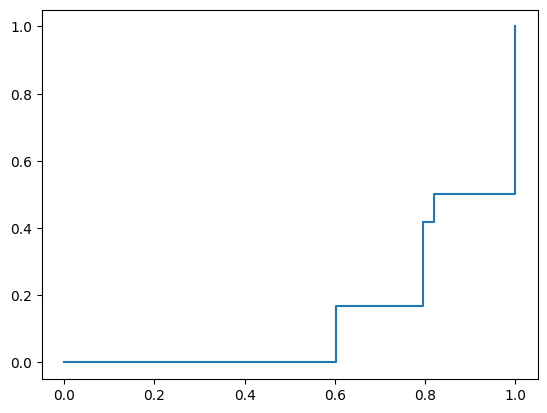

In [19]:


# Plotting ROC curve
plt.plot(FPR,TPR)

